<a href="https://colab.research.google.com/github/merajsiddieque/ML-Lab/blob/main/ML_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Dice roll experiment
def dice_experiment(num_rolls, num_experiments):
    """Simulate rolling a die 'num_rolls' times, repeated 'num_experiments' times"""
    rolls = np.random.randint(1, 7, size=(num_experiments, num_rolls))  # uniform(1-6)
    sums = np.sum(rolls, axis=1)
    return sums

# Parameters
roll_counts = range(2, 51)   # from 2 dice rolls to 50
experiment_counts = [100, 500, 1000, 5000, 10000, 50000, 100000]

# Create output folder
output_dir = "dice_histograms"
os.makedirs(output_dir, exist_ok=True)

# Store results
results = []

for n_rolls in roll_counts:
    for n_experiments in experiment_counts:
        # Run experiment
        sums = dice_experiment(n_rolls, n_experiments)

        # Compute mean and variance
        mean = np.mean(sums)
        variance = np.var(sums)
        results.append((n_rolls, n_experiments, mean, variance))

        # Plot histogram
        plt.figure(figsize=(6,4))
        plt.hist(sums, bins=30, color="skyblue", edgecolor="black", density=True)
        plt.title(f"Histogram of sum of {n_rolls} dice rolls ({n_experiments} experiments)")
        plt.xlabel("Sum of dice rolls")
        plt.ylabel("Frequency (normalized)")

        # Save histogram
        filename = f"rolls_{n_rolls}_experiments_{n_experiments}.png"
        plt.savefig(os.path.join(output_dir, filename))
        plt.close()

# Save results as a CSV
import pandas as pd
df = pd.DataFrame(results, columns=["Num_Rolls", "Num_Experiments", "Mean", "Variance"])
df.to_csv("dice_experiment_results.csv", index=False)

print("✅ Experiments complete! Histograms saved in 'dice_histograms' and results in CSV.")


✅ Experiments complete! Histograms saved in 'dice_histograms' and results in CSV.


In [ ]:
df = pd.read_csv('/content/dice_experiment_results.csv')

In [ ]:
df.head()

,Num_Rolls,Num_Experiments,Mean,Variance
0,2,100,7.0900,5.781900
1,2,500,7.0700,6.245100
2,2,1000,6.9610,5.723479
3,2,5000,7.0414,5.822886
4,2,10000,6.9608,5.903663


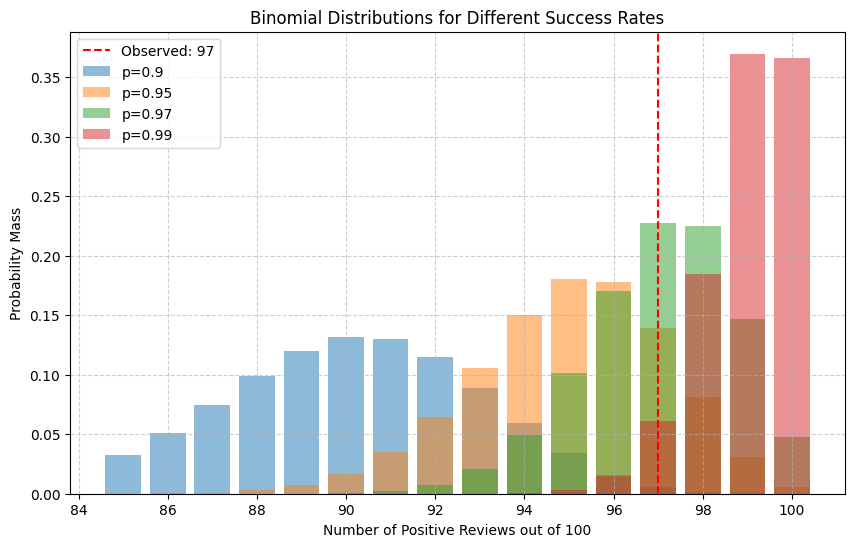

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 100   # number of reviews
k = 97    # observed positive reviews

# Candidate success probabilities
p_values = [0.90, 0.95, 0.97, 0.99]

# Plot Binomial distributions
plt.figure(figsize=(10,6))

x = np.arange(85, 101)  # focus on high values

for p in p_values:
    pmf = binom.pmf(x, n, p)
    plt.bar(x, pmf, alpha=0.5, label=f"p={p}", width=0.8)

# Mark observed value
plt.axvline(k, color="red", linestyle="--", label=f"Observed: {k}")

plt.title("Binomial Distributions for Different Success Rates")
plt.xlabel("Number of Positive Reviews out of 100")
plt.ylabel("Probability Mass")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

def column_entropy(series, bins=10):
    """Compute entropy of a pandas Series.
       If continuous → bin into intervals before computing entropy."""
    if series.dtype == 'object' or series.dtype.name == 'category':
        # categorical: direct frequency count
        counts = series.value_counts(normalize=True)
    else:
        # continuous: bin into intervals
        counts, _ = np.histogram(series.dropna(), bins=bins, density=False)
        counts = counts / counts.sum()  # normalize to probabilities
    return entropy(counts, base=2)  # base=2 for bits

def dataset_entropy(df, bins=10):
    """Compute entropy for all columns in a DataFrame"""
    entropies = {}
    for col in df.columns:
        entropies[col] = column_entropy(df[col], bins)
    return pd.Series(entropies, name="Entropy")


In [ ]:
# Load datasets (examples)
df1 = pd.read_csv("/content/faa_ai_prelim.csv")
df2 = pd.read_csv("/content/Housing.csv")
df3 = pd.read_csv("/content/advertising.csv")

# Compute entropy for each dataset
entropy_df1 = dataset_entropy(df1)
entropy_df2 = dataset_entropy(df2)
entropy_df3 = dataset_entropy(df3)

print("Dataset 1:\n", entropy_df1, "\n")
print("Dataset 2:\n", entropy_df2, "\n")
print("Dataset 3:\n", entropy_df3, "\n")


Dataset 1:
 UPDATED                0.224327
ENTRY_DATE             2.789723
EVENT_LCL_DATE         3.850247
EVENT_LCL_TIME         6.197270
LOC_CITY_NAME          6.278654
LOC_STATE_NAME         4.332994
LOC_CNTRY_NAME         0.000000
RMK_TEXT               6.326847
EVENT_TYPE_DESC        0.910053
FSDO_DESC              5.205402
REGIST_NBR             6.375039
FLT_NBR                2.584963
ACFT_OPRTR             2.521641
ACFT_MAKE_NAME         3.893794
ACFT_MODEL_NAME        5.562903
ACFT_MISSING_FLAG           NaN
ACFT_DMG_DESC          1.819940
FLT_ACTIVITY           2.038160
FLT_PHASE              1.860027
FAR_PART               0.000000
MAX_INJ_LVL            1.847420
FATAL_FLAG             0.000000
FLT_CRW_INJ_NONE       0.698543
FLT_CRW_INJ_MINOR      0.918296
FLT_CRW_INJ_SERIOUS    0.000000
FLT_CRW_INJ_FATAL      1.000000
FLT_CRW_INJ_UNK             NaN
CBN_CRW_INJ_NONE            NaN
CBN_CRW_INJ_MINOR           NaN
CBN_CRW_INJ_SERIOUS         NaN
CBN_CRW_INJ_FATAL           

/tmp/ipython-input-2345905152.py:14: RuntimeWarning: invalid value encountered in divide
  counts = counts / counts.sum()  # normalize to probabilities
/tmp/ipython-input-2345905152.py:14: RuntimeWarning: invalid value encountered in divide
  counts = counts / counts.sum()  # normalize to probabilities
